# Gai/Lib: Examples

## Text-to-Text (TTT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=ttt \
    -f ../../gai-sdk/gai-gen/Dockerfile.TTT \
    -t gai-ttt:latest ../../gai-sdk/gai-gen/
```

### Example: exllamav2-mistral7b (**GPU Required**)

Download model

```bash
huggingface-cli download bartowski/Mistral-7B-Instruct-v0.3-exl2 \
    --revision 1a09a351a5fb5a356102bfca2d26507cdab11111 \
    --local-dir ~/gai/models/Mistral-7B-Instruct-v0.3-exl2 \
    --local-dir-use-symlinks False

```

1. Start service

In [ ]:
%%bash
docker container rm -f gai-ttt
docker run -d \
    -e DEFAULT_GENERATOR=exllamav2-mistral7b \
    -e LOG_LEVEL=DEBUG \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12031:12031 \
    --name gai-ttt \
    gai-ttt:latest

2. Chat

In [2]:
import os
os.environ["LOG_LEVEL"]="WARNING"

from gai.lib.GGG import GGG
ggg=GGG(category="ttt",type="gai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
#ggg=GGG(category="ttt",type="openai",config_path="./gai.local.yml")

for chunk in ggg(
    messages="user: Tell me a one paragraph story\nassistant:",
    max_new_tokens=100,
    max_tokens=100
    ):
    print(chunk.decode(),end="",flush=True)
print("\n")

ERROR    TTTClient.api: gaigen error=Connection Error. Is the service Running?


Exception: Connection Error. Is the service Running?

3. Function Call

In [2]:
import os
os.environ["LOG_LEVEL"]="WARNING"

from gai.lib.GGG import GGG
ggg=GGG(category="ttt",type="openai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
#ggg=GGG(category="ttt",type="openai",config_path="./gai.local.yml")

response = ggg(
    messages="user: What is today's date?\nassistant:",
    tools=[
        {
            "type": "function",
            "function": {
                "name": "gg",
                "description": "The 'gg' function is a powerful tool that allows the AI to gather external information from the internet using Google search. It can be invoked when the AI needs to answer a question or provide information that requires up-to-date, comprehensive, and diverse sources which are not inherently known by the AI. For instance, it can be used to find current news, weather updates, latest sports scores, trending topics, specific facts, or even the current date and time. The usage of this tool should be considered when the user's query implies or explicitly requests recent or wide-ranging data, or when the AI's inherent knowledge base may not have the required or most current information. The 'search_query' parameter should be a concise and accurate representation of the information needed.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "search_query": {
                            "type": "string",
                            "description": "The search query to search google with. For example, to find the current date or time, use 'current date' or 'current time' respectively."
                        }
                    },
                    "required": ["search_query"]
                }
            }
        }                   
    ],
    stream=False)
print(response.decode())

{'type': 'function', 'name': 'gg', 'arguments': '{"search_query":"current date"}'}


4. JSON Mode

In [3]:
import os
os.environ["LOG_LEVEL"]="WARNING"

from gai.lib.GGG import GGG
ggg=GGG(category="ttt",type="gai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
# ggg=GGG(category="ttt",type="openai",config_path="./gai.local.yml")

# Define Grammar
from dataclasses import dataclass
@dataclass
class Book:
    title: str
    summary: str
    topic: str
    author: str
    keywords: list
    published_year: int
from pydantic import TypeAdapter
type_adaptor=TypeAdapter(Book)
schema=type_adaptor.json_schema()

# Convert unstructured to book record
text = """Foundation is a science fiction novel by American writer
Isaac Asimov. It is the first published in his Foundation Trilogy (later
expanded into the Foundation series). Foundation is a cycle of five
interrelated short stories, first published as a single book by Gnome Press
in 1951. Collectively they tell the early story of the Foundation,
an institute founded by psychohistorian Hari Seldon to preserve the best
of galactic civilization after the collapse of the Galactic Empire.
"""

response = ggg(
    messages=f"user: transform this to JSON.\n`{text}`\nassistant:",
    schema=schema,
    stream=False)
print(response.decode())

{'type': 'content', 'content': '{\n  "title": "Foundation",\n  "summary": "Foundation is a science fiction novel by American writer Isaac Asimov. It is the first published in his Foundation Trilogy (later expanded into the Foundation series). Foundation is a cycle of five interrelated short stories, first published as a single book by Gnome Press in 1951.",\n  "topic": "Science Fiction",\n  "author": "Isaac Asimov",\n  "keywords": ["Foundation Trilogy", "Galactic Empire", "Psychohistorian"],\n  "published_year": 1951\n}'}


In [4]:
from gai.lib.GGG import GGG
ggg=GGG(category="ttt",type="gai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
#ggg=GGG(category="ttt",type="openai",config_path="./gai.local.yml")

# Define Grammar
schema = {
    'type': 'object',
    'properties': {
        'relevance': {
            'type': 'string',
            'enum': ['High', 'Medium', 'Low']
        },
        'reason': {
            'type': 'string'
        }
    },
    'required': ['relevance']
    }
subject="Latest News in Singapore"
topic="""The New Paper - Breaking News, Sports, Entertainment & Lifestyle News Skip to main content 
    Toggle navigation The New Paper Search The New Paper Home News Sports Entertainment Lifestyle 
    Racing Reset Search Top Stories Singapore MFA officer fined for taking nude photos of male 
    customers Jun 13, 2024 Singapore Man who allegedly removed carpark barrier arms charged Jun 13, 2024 
    Singapore Diners brawl with adult shop owner over queueing space Jun 13, 2024 TV Actress Chantalle Ng 
    treats fans to lunch Jun 13, 2024 Singapore All government agencies to use the same SMS Sender ID 
    Jun 13, 2024 Team Singapore 5 things about Tan Zong Yang, sprinter Shanti Pereira’s fiance Jun 13, 2024 
    Singapore FairPrice shoppers can use vouchers to buy discounted essentials Jun 13, 2024 Singapore 
    Driver, 74, taken to hospital after car skids, hits bollard Jun 13, 2024 More Stories Movies Young 
    stars hope I Not Stupid 3 discourages parents from putting pressure on kids Jun 13, 2024 TV 'Er Gu' 
    goes digital: Veteran"""
response = ggg(
    messages=[{'content': f"""Compare the relevance between {{'Subject': {subject}}} and {{'Topic': {topic} }}. 
               You should format the result according to this json schema: {schema}""",
               'role': 'user'},
              {'content': '', 'role': 'assistant'}],
    schema=schema,
    stream=False)
print(response.decode())

{'type': 'content', 'content': '{"relevance": "High", "reason": "The provided topic directly relates to the latest news in Singapore, as reported by The New Paper."}'}


-----

## Text-to-Speech (TTS)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=tts \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-tts:latest ../../gai-sdk/gai-gen/
```

Download model

The following demo is uses Coqui AI's xTTS model. Create and run the following script `xtts_download.py` to download the model:

```python
# xtts_download.py
import os
os.environ["COQUI_TOS_AGREED"]="1"

from TTS.utils.manage import ModelManager
print("Downloading...")
mm =  ModelManager(output_prefix="~/gai/models/tts")
model_name="tts_models/multilingual/multi-dataset/xtts_v2"
mm.download_model(model_name)
print("Downloaded")
```

Take note that loading the model for the first time will take a while for deepspeed to compile the model.

Start service

Convert the input text "The definition of insanity is doing the same thing over and over and expecting different results." to speech using the examples below.

In [ ]:
%%bash
docker container rm -f gai-ttt gai-tts
docker run -d \
    -e DEFAULT_GENERATOR=xtts-2 \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12032:12032 \
    --name gai-tts \
    gai-tts:latest

### Example: Coqui xTTS

In [1]:
from gai.lib.GGG import GGG
ggg=GGG(category="tts",type="gai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
# ggg=GGG(category="tts",type="openai",config_path="./gai.local.yml")

response = ggg(input="The definition of insanity is doing the same thing over and over and expecting different results.",stream=True)

from gai.common.sound_utils import play_audio,save_audio
play_audio(response)

DEBUG    httppost:url=http://localhost:12032/gen/v1/audio/speech
DEBUG    httppost:data={'input': 'The definition of insanity is doing the same thing over and over '
          'and expecting different results.',
 'language': None,
 'stream': True,
 'voice': None}


---

## Speech-to-Text (STT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=stt \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-stt:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download openai/whisper-large-v3 \
        --local-dir ~/gai/models/whisper-large-v3 \
        --local-dir-use-symlinks False
```

Start service

In [ ]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt
docker run -d \
    -e DEFAULT_GENERATOR=whisper-transformers \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12033:12033 \
    --name gai-stt \
    gai-stt:latest

Original Audio

In [ ]:
# sample
with open("./data/today-is-a-wonderful-day.wav", "rb") as f:
    play_audio(f.read())

Example: Transcribe audio with local Whisper

In [1]:
from gai.lib.GGG import GGG
ggg=GGG(category="stt",type="gai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
#ggg=GGG(category="stt",type="openai",config_path="./gai.local.yml")

with open("./data/today-is-a-wonderful-day.wav", "rb") as f:
    output = ggg(file=f)
    print(output.text)

DEBUG    httppost:url=http://localhost:12033/gen/v1/audio/transcriptions
DEBUG    httppost:data=None


Exception: Connection Error. Is the service Running?

---

## Image-to-Text (ITT)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=itt \
    -f ../../gai-sdk/gai-gen/Dockerfile.ITT \
    -t gai-itt:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download liuhaotian/llava-v1.5-7b \
        --local-dir ~/gai/models/llava-v1.5-7b \
        --local-dir-use-symlinks False
```

Start service

In [ ]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt
docker run -d \
    -e DEFAULT_GENERATOR=llava-transformers \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12034:12034 \
    --name gai-itt \
    gai-itt:latest

Here is the image

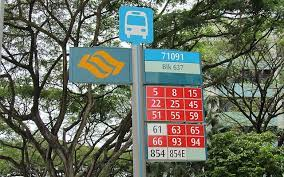

In [2]:
from gai.common.image_utils import read_to_base64
import os
from IPython.display import Image,display
encoded_string = read_to_base64("./data/buses.jpeg")
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "What’s in this image?"},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_string}",
                },
            },
        ],
    }
]
display(Image("./data/buses.jpeg"))

Example: Describe with Llava

DEBUG    httppost:url=http://localhost:12034/gen/v1/vision/completions
DEBUG    httppost:data={'messages': [{'content': [{'text': 'What’s in this image?', 'type': 'text'},
                           {'image_url': {'url': ''},
                            'type': 'image_url'}],
               'role': 'user'}],
 'stream': True}

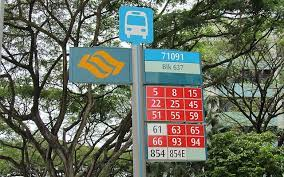

The image features a bus stop with a bus schedule sign on a pole. The sign displays the bus route, including the numbers 701 and 702, and the destination of the bus. The bus stop is located near a tree, providing a natural backdrop to the scene.({'finish_reason': 'stop'}, 'finish_reason')

In [3]:
from gai.lib.GGG import GGG
ggg=GGG(category="itt",type="gai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
# ggg=GGG(category="itt",type="openai",config_path="./gai.local.yml")

# # Llava
# from gai.lib.GGG import GGG
# ggg=GGG("./gai.local.yml")

for chunk in ggg(
    messages=messages,
    stream=True
    ):
    print(chunk.decode(),end="",flush=True)

---

## Text-to-Image (TTI)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=tti \
    -f ../../gai-sdk/gai-gen/Dockerfile.TTI \
    -t gai-tti:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models/Stable-diffusion
huggingface-cli download runwayml/stable-diffusion-v1-5 v1-5-pruned-emaonly.safetensors --local-dir ~/gai/models/Stable-diffusion --local-dir-use-symlinks False
```

Start service

In [ ]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt gai-tti
docker run -d \
    --gpus all \
    -e CLI_ARGS="--listen --api --xformers --medvram" \
    -v ~/gai/models/Stable-diffusion:/stable-diffusion-webui/models/Stable-diffusion \
    -v ~/gai/models/VAE:/stable-diffusion-webui/models/VAE \
    -p 12035:12035 \
    --name gai-tti \
    gai-tti:latest

### Example: Stable Diffusion

To check if stable diffusion is running, open browser and browse to "http://localhost:12035/docs"

DEBUG    httppost:url=http://localhost:12035/sdapi/v1/txt2img
DEBUG    httppost:data={'height': 512,
 'negative_prompt': 'ugly, duplicate, morbid, mutilated, out of frame, extra '
                    'fingers, mutated hands, poorly drawn hands, poorly drawn '
                    'face, mutation, deformed, ugly, blurry, bad anatomy, bad '
                    'proportions, extra limbs, cloned face, out of frame, '
                    'ugly, extra limbs, bad anatomy, gross proportions, '
                    'malformed limbs, missing arms, missing legs, extra arms, '
                    'extra legs, mutated hands, fused fingers, too many '
                    'fingers, long neck, extra head, cloned head, extra body, '
                    'cloned body, watermark. extra hands, clone hands, weird '
                    'hand, weird finger, weird arm, (mutation:1.3), '
                    '(deformed:1.3), (blurry), (bad anatomy:1.1), (bad '
                    'proportions:1.2), out of frame, u

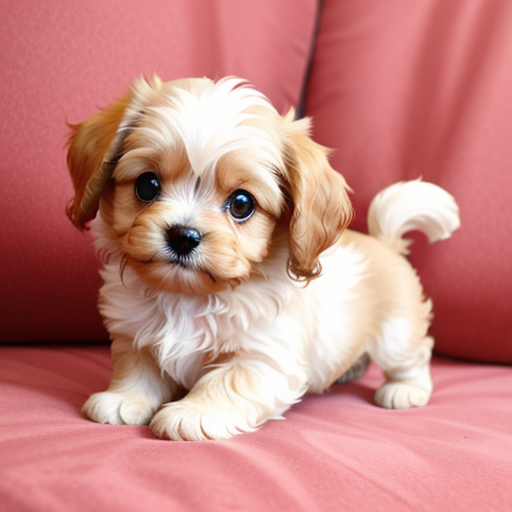

In [4]:
# stable diffusion
from gai.lib.GGG import GGG
ggg=GGG(category="tti",type="gai",config_path="./gai.local.yml")
# Uncomment the line below to use OpenAI's model
# ggg=GGG(category="tti",type="openai",config_path="./gai.local.yml")

image_data=ggg(
    prompt="maltese puppy",
    steps=5
    )
from PIL import Image
from io import BytesIO
from IPython.display import display
image = Image.open(BytesIO(image_data))
display(image)

---
## Retrieval Augmented Generation (RAG)

### Setup

Build the docker image using the following command in terminal.

```bash
docker buildx build \
    --build-arg CATEGORY=rag \
    -f ../../gai-sdk/gai-gen/Dockerfile \
    -t gai-rag:latest ../../gai-sdk/gai-gen/
```

Download model

```bash
mkdir ~/gai/models
huggingface-cli download hkunlp/instructor-large \
        --local-dir ~/gai/models/instructor-large \
        --local-dir-use-symlinks False
```

Start service

In [ ]:
%%bash
docker container rm -f gai-ttt gai-tts gai-stt gai-itt gai-tti gai-rag
docker run -d \
    -e DEFAULT_GENERATOR=instructor-rag \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12036:12036 \
    --name gai-rag \
    gai-rag:latest

In [ ]:
%%bash
docker run -d \
    -e DEFAULT_GENERATOR=exllamav2-mistral7b \
    --gpus all \
    -v ~/gai/models:/app/models \
    -p 12031:12031 \
    --name gai-ttt \
    gai-ttt:latest

Step 1: Index the file 'pm_long_speech_2023.txt' into the vector database. This will break down the file into chunks of 1000 char and convert to text embeddings, then store them in the database.

In [4]:
# Index 2023 national day speech 
import asyncio
from gai.lib.RAGClientAsync import RAGClientAsync

async def listener(status):
    print(status)
rag=RAGClientAsync("./gai.local.yml")
response = await rag.index_document_async(
        collection_name="demo",
        file_path="./data/pm_long_speech_2023.txt",
        title="2023 National Day Rally Speech",
        source="https://www.pmo.gov.sg/Newsroom/national-day-rally-2023",
        async_callback=listener,
    )


DEBUG    httppost:url=http://localhost:12036/gen/v1/rag/index-file
DEBUG    httppost:data=None
INFO     Connected to ws://localhost:12036/gen/v1/rag/index-file/ws/demo


{"message": "Request received."}
{"message": "Breaking down document into chunks ..."}
{"message": "Start indexing..."}
{"progress": 1}
{"progress": 3}
{"progress": 4}
{"progress": 6}
{"progress": 7}
{"progress": 9}
{"progress": 10}
{"progress": 12}
{"progress": 13}
{"progress": 15}
{"progress": 16}
{"progress": 18}
{"progress": 19}
{"progress": 21}
{"progress": 22}
{"progress": 24}
{"progress": 25}
{"progress": 27}
{"progress": 28}
{"progress": 30}
{"progress": 31}
{"progress": 33}
{"progress": 34}
{"progress": 36}
{"progress": 37}
{"progress": 39}
{"progress": 40}
{"progress": 42}
{"progress": 43}
{"progress": 45}
{"progress": 46}
{"progress": 48}
{"progress": 50}
{"progress": 51}
{"progress": 53}
{"progress": 54}
{"progress": 56}
{"progress": 57}
{"progress": 59}
{"progress": 60}
{"progress": 62}
{"progress": 63}
{"progress": 65}
{"progress": 66}
{"progress": 68}
{"progress": 69}
{"progress": 71}
{"progress": 72}
{"progress": 74}
{"progress": 75}
{"progress": 77}
{"progress": 78}
{"

In [ ]:
# Confirm File Uploaded

from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
docs = await rag.list_documents_async()
print(docs)


### Step 3: Query and Retrieve

This method uses 2 models: embedding and text generation.

There are 4 scenarios that you can run this:
* GPU only: Run both embedding and text generation on GPU. This is the fastest configuration but only if you have enough GPU resources.
* GPU + CPU: Run the embedding on GPU and text generation on CPU. This configuration can take up to 2 minutes to complete the retrieval.
* GPU + openai: Run the embedding on GPU and openai-gpt4 for text generation. This assumes you have an openai API key.
* CPU only: Run both embedding and text generation on CPU. This is the slowest configuration and least preferrable.

The following setup is designed for running entirely on GPU, ie. "gai". If you have trouble running on GPU, you can try switching "gai" to "openai" in the command below for text generation.

In [ ]:
from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
data = {
    "collection_name": "demo",
    "query_texts": "Who are the young seniors?",
}
response = await rag.retrieve_async(**data)
context = response
question = "Who are the young seniors?"

from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
answer = ggg("ttt", 
             type="gai", 
             messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:"
             )
for chunk in answer:
    print(chunk.decode(), end="", flush=True)

### Step 4: Query and Retrieve with Function Call

The AI will decide based on the context of the conversation, if the response require retrieval to answer the user's query.
The following example demonstrates the flow involving function call. 


In [ ]:
# Setup
from gai.lib.GGG import GGG
ggg=GGG(("./gai.local.yml"))
tools = [
    {
        "type": "function",
        "function": {
            "name": "rag",
            "description": "The \'rag\' function is a specialized tool that allows the AI to perform semantic searches on PM Lee Hsien Loong\'s 2023 National Day Rally. It can be invoked when the AI needs to retrieve facts or information from the speech. This function utilizes advanced Natural Language Processing (NLP) techniques to understand and match the semantic meaning of the user\'s query with the content of the speech. This is particularly useful when the user\'s query relates to specific themes, topics, or statements made during the rally.",
            "parameters": {
                "type": "object",
                "properties": {
                    "search_query": {
                        "type": "array",
                        "items": {
                            "type":"string"
                        },
                        "description": "An array of query strings to perform a semantic search in the vector database. Each string in the array represents a different way of asking the question. This expands the coverage of the search and increases the chance of finding the best match. For example, instead of using one query like \'economic policies\', use multiple variations like [\'PM Lee Hsien Loong's economic policies announced at the 2023 National Day Rally\', \'What were the economic strategies discussed by PM Lee in 2023 National Day Rally?\', \'Economic measures announced by PM Lee in 2023 Rally\']."
                    }
                },
                "required": ["search_query"]
            }
        }
    }
]

# Objective
question = "What did PM Lee said about young seniors?"

# Function Call
messages = [{'role':'user','content':question},{'role':'assistant','content':''}]
response = ggg(category="ttt",
    type="openai",
    messages=messages, 
    tools=tools,
    stream=False)
result=response.decode()
query_texts=result["arguments"]
query_texts

In [ ]:
# Retrieval
from gai.lib.RAGClientAsync import RAGClientAsync
rag = RAGClientAsync("./gai.local.yml")
data = {
    "collection_name": "demo",
    "query_texts": query_texts,
}
response = await rag.retrieve_async(**data)
response

In [ ]:
# Response
context = response

from gai.lib.GGG import GGG
ggg=GGG("./gai.local.yml")
answer = ggg("ttt", type="openai", messages=f"user: Based on the context below: <context>{context}</context>, answer the question: {question}\nassistant:")
for chunk in answer:
    print(chunk.decode(), end="", flush=True)